<a href="https://colab.research.google.com/github/stutis28/Deep-Learning/blob/master/MpNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset

In [0]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [0]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [0]:
data['class'] = breast_cancer.target

In [14]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
data.shape

(569, 31)

In [16]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [18]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [19]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Splitting Dataset into Train Test

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X = data.drop('class', axis = 1)
Y = data['class']

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y,random_state = 42)

In [27]:
print(Y.mean(),Y_train.mean(),Y_test.mean())

0.6274165202108963 0.628140703517588 0.6257309941520468


# Binarization of Feature Values fo MPNeuron

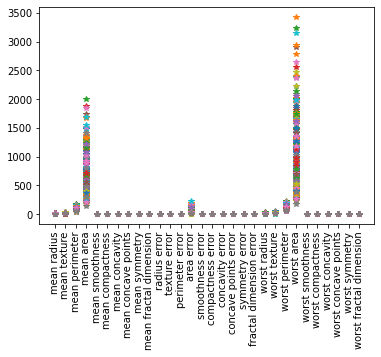

In [35]:
plt.plot(X_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [0]:
X_binarised_train = X_train.apply(pd.cut, bins = 2, labels =[1,0])

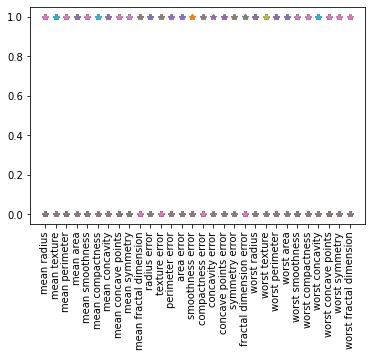

In [38]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [0]:
X_binarised_test = X_test.apply(pd.cut, bins = 2, labels = [1,0])

In [0]:
X_binarised_test = X_binarised_test.values

In [0]:
X_binarised_train = X_binarised_train.values

In [42]:
type(X_binarised_test)

numpy.ndarray

# MP Neuron Model

In [55]:
# Since binarization was not giving correct outputs we have replaced the labels based on obeservation
for b in range(X_binarised_train.shape[1] + 1):
  Y_pred_train = []
  accurate_rows = 0

  for x,y in zip(X_binarised_train,Y_train):
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)
  
  print(b, accurate_rows / X_binarised_train.shape[0])

0 0.628140703517588
1 0.2814070351758794
2 0.18090452261306533
3 0.1457286432160804
4 0.135678391959799
5 0.135678391959799
6 0.15577889447236182
7 0.17839195979899497
8 0.19597989949748743
9 0.22110552763819097
10 0.24623115577889448
11 0.27386934673366836
12 0.2989949748743719
13 0.30402010050251255
14 0.31909547738693467
15 0.33668341708542715
16 0.34673366834170855
17 0.3492462311557789
18 0.35678391959798994
19 0.36180904522613067
20 0.3693467336683417
21 0.3693467336683417
22 0.37185929648241206
23 0.37185929648241206
24 0.37185929648241206
25 0.37185929648241206
26 0.37185929648241206
27 0.37185929648241206
28 0.37185929648241206
29 0.37185929648241206
30 0.37185929648241206


In [78]:
for b in range(X_binarised_train.shape[1] + 1):
  Y_pred_train = []
  accurate_rows = 0

  for x,y in zip(X_binarised_train,Y_train):
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)
  
  print(b, accurate_rows / X_binarised_train.shape[0])

0 0.628140703517588
1 0.628140703517588
2 0.628140703517588
3 0.628140703517588
4 0.628140703517588
5 0.628140703517588
6 0.628140703517588
7 0.628140703517588
8 0.628140703517588
9 0.628140703517588
10 0.6306532663316583
11 0.6306532663316583
12 0.6381909547738693
13 0.6432160804020101
14 0.6507537688442211
15 0.6532663316582915
16 0.6633165829145728
17 0.6809045226130653
18 0.6959798994974874
19 0.7010050251256281
20 0.7261306532663316
21 0.7537688442211056
22 0.7788944723618091
23 0.8040201005025126
24 0.821608040201005
25 0.8442211055276382
26 0.864321608040201
27 0.864321608040201
28 0.8542713567839196
29 0.8190954773869347
30 0.7185929648241206


In [71]:
#generating accuracy on test data
b = 28
Y_pred_test = []

for x in X_binarised_test:
  y_pred = (np.sum(x) >= b)
  Y_pred_test.append(y_pred)

accuracy = accuracy_score(Y_pred_test, Y_test)

print(b, accuracy)

28 0.8245614035087719


# MP Neuron Class

In [0]:
class MPNeuron:

  def __init__(self):
    self.b = None
  
  def model(self, x):
    return (sum(x) >= self.b)

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}

    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)

    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b

    print("Optimal value of b is ", best_b)
    print("Highest accuracy is ", accuracy[best_b])

In [80]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)


Optimal value of b is  26
Highest accuracy is  0.864321608040201


# Perceptron class

In [0]:
class Perceptron:

  def __init__ (self):
    self.w = None
    self.b = None
  
  def model(self, x):
    return 1 if (np.dot(self.w,x) >= self.b) else 0

  def predict(self,X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y):
    self.w = np.ones(X.shape[1])
    self.b = 0

    for x, y in zip(X, Y):
      y_pred = self.model(x)
      if y == 1 and y_pred == 0:
        self.w = self.w + x
        self.b = self.b + 1
      elif y == 0 and y_pred == 1:
        self.w = self.w - x
        self.b = self.b - 1


In [0]:
perceptron = Perceptron()


In [0]:
X_train = X_train.values
Y_train = Y_train.values

In [0]:
perceptron.fit(X_train, Y_train)

In [95]:
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train, Y_train))

0.9195979899497487
